In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#MLP usando sklearn
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# url = "lib/drybean/Dry_Bean_Dataset.xlsx"
url = 'https://docs.google.com/spreadsheets/d/1N-KOihE3XDDfHEsaj8dt9-y8jrVOv8wB/edit?usp=sharing&ouid=102198786401215745194&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# loading dataset into Pandas DataFrame
dataset = pd.read_excel(path, engine = 'openpyxl')


### 16 características , 3 neurônios de saída. (16+3)/2 = 10 neurônios

In [3]:
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
## Separando as caracteristicas do alvo

y = dataset['Class']
x = dataset.drop(['Class'], axis=1)

In [5]:
## Separar o dataset entre dados de treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) #0.3 data as data test

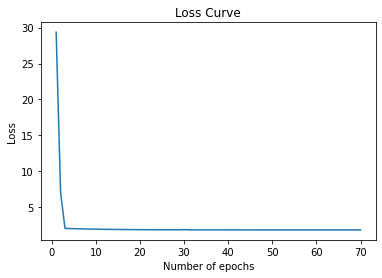

In [6]:
#inicialização - Nossa rede tera 4 entradas, 1º camada 10 neuronios, 2º camada 5 neuronios, saida com 3 neurios
Model = MLPClassifier(hidden_layer_sizes=(10,5), verbose=0,  random_state=5) # verbode=0 to tirar log

#train

def show_loss_curve():
    global h
    h = Model.fit(x_train,y_train)

    global y_pred
    y_pred = Model.predict(x_test)

    import matplotlib.pyplot as plt

    plt.plot(range(1, h.n_iter_ + 1), h.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Number of epochs')
    plt.ylabel('Loss')
    plt.show()

show_loss_curve()

In [7]:
#agora vou utilizar as funções de classificação estatística

def show_class_report():
    print(classification_report(y_test,y_pred)) # Print 
    #print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
    print('O acerto foi de: ',accuracy_score(y_pred,y_test)) # Print accuracy score

show_class_report()

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       389
      BOMBAY       0.00      0.00      0.00       134
        CALI       0.00      0.00      0.00       501
    DERMASON       0.26      1.00      0.41      1057
       HOROZ       0.00      0.00      0.00       594
       SEKER       0.00      0.00      0.00       579
        SIRA       0.00      0.00      0.00       830

    accuracy                           0.26      4084
   macro avg       0.04      0.14      0.06      4084
weighted avg       0.07      0.26      0.11      4084

O acerto foi de:  0.2588148873653281


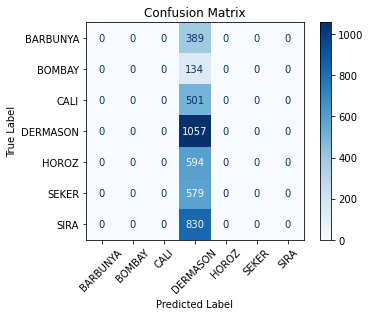

In [8]:
def show_confusion_matrix():    
    
    color = 'black'
    matrix = plot_confusion_matrix(h, x_test.values, y_test.values, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix', color=color)
    plt.xlabel('Predicted Label', color=color)
    plt.ylabel('True Label', color=color)
    plt.gcf().axes[0].tick_params(colors=color, axis='x', rotation=45)
    plt.gcf().axes[1].tick_params(colors=color)
    plt.show()

show_confusion_matrix()

In [9]:
### Percebe-se que, para as configurações utilizadas, o modelo consegue apenas prever um tipo de feijão (DERMASON)

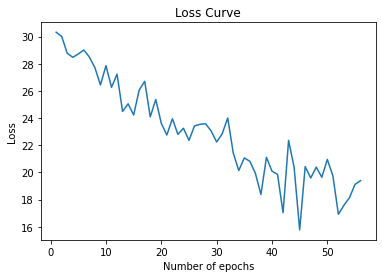

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       389
      BOMBAY       0.31      1.00      0.47       134
        CALI       0.90      0.04      0.07       501
    DERMASON       0.97      0.53      0.68      1057
       HOROZ       0.46      0.14      0.21       594
       SEKER       0.00      0.00      0.00       579
        SIRA       0.29      0.99      0.44       830

    accuracy                           0.39      4084
   macro avg       0.42      0.38      0.27      4084
weighted avg       0.50      0.39      0.32      4084

O acerto foi de:  0.39471106758080315


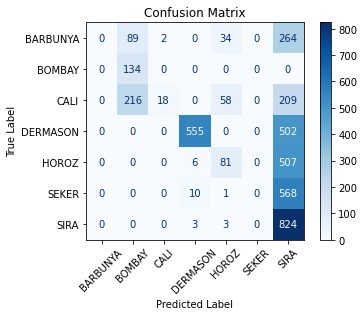

In [10]:
### Alterando valor de números de neurônios

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) #0.3 data as data test
Model = MLPClassifier(hidden_layer_sizes=(100), verbose=0,  random_state=5, alpha = 0.0001
                        , activation='relu') # verbode=0 to tirar log
show_loss_curve()
show_class_report()
show_confusion_matrix()


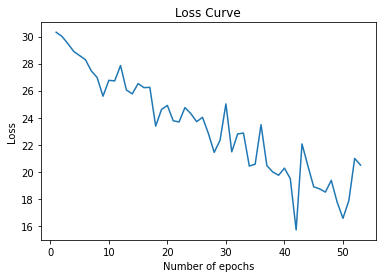

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       389
      BOMBAY       1.00      0.89      0.94       134
        CALI       0.33      1.00      0.50       501
    DERMASON       0.99      0.46      0.63      1057
       HOROZ       0.82      0.46      0.59       594
       SEKER       0.00      0.00      0.00       579
        SIRA       0.32      0.63      0.43       830

    accuracy                           0.47      4084
   macro avg       0.50      0.49      0.44      4084
weighted avg       0.51      0.47      0.43      4084

O acerto foi de:  0.46767874632713025


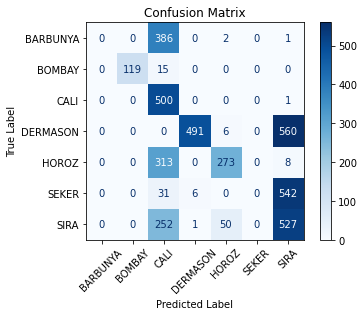

In [11]:
## Alterando agora o alpha

### Alterando valor de números de neurônios

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) #0.3 data as data test
Model = MLPClassifier(hidden_layer_sizes=(100), verbose=0,  random_state=5, alpha = 0.00001
                        , activation='relu') # verbode=0 to tirar log

show_loss_curve()
show_class_report()
show_confusion_matrix()


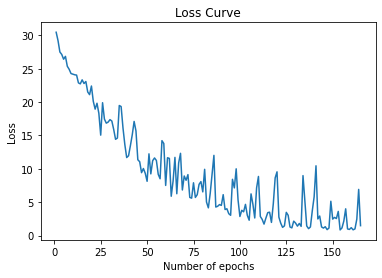

              precision    recall  f1-score   support

    BARBUNYA       0.44      0.63      0.51       389
      BOMBAY       0.99      0.99      0.99       134
        CALI       0.94      0.18      0.30       501
    DERMASON       0.93      0.70      0.80      1057
       HOROZ       0.63      0.91      0.74       594
       SEKER       1.00      0.30      0.46       579
        SIRA       0.49      0.86      0.62       830

    accuracy                           0.64      4084
   macro avg       0.77      0.65      0.63      4084
weighted avg       0.76      0.64      0.62      4084

O acerto foi de:  0.6442213516160626


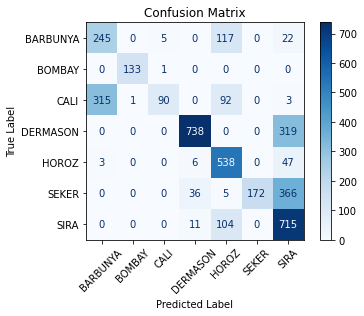

In [12]:
## Alterando agora a função de ativação

### Alterando valor de números de neurônios

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) #0.3 data as data test
Model = MLPClassifier(hidden_layer_sizes=(10,5), verbose=0,  random_state=5, alpha = 0.0001
                        , activation='identity') # verbode=0 to tirar log

show_loss_curve()
show_class_report()
show_confusion_matrix()
